In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
import plotly.express as px

In [256]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [14]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [15]:
df1=pd.read_csv("after_univariate.csv",index_col="Unnamed: 0")
df=df1.copy()

In [16]:
df.head()

brand  price thickness  weight  screen_size  ppi  threads  ram  antiglare  \
0   Acer  25990    medium    lite           14  157      4.0    8          1   
1  Wings  34990       NaN  medium           15  141      8.0    8          1   
2    MSI  49990    medium  medium           15  141     12.0   16          1   
3   Acer  79745     thick   heavy           15  141     12.0    8          1   
4   Acer  35990    medium  medium           15  141     12.0   16          1   

   touch_screen  cores  battery_capacity  battery_cell  hdmi  ethernet  \
0             0    2.0             45.50           2.0     1         1   
1             0    4.0             17.85           NaN     1         0   
2             0    8.0             51.00           3.0     1         1   
3             0    8.0               NaN           NaN     1         1   
4             0    6.0             36.00           3.0     1         1   

   multi_card_reader  thunderbolt  display_port  vga  backlit  \
0                  0            0             0    0        0   
1                  0            0             0    0        1   
2                  0            1             0    0        1   
3                  0            0             0    0        1   
4                  1            0             0    0        0   

   fingerprint_sensor  usb2  usb3  typec  processor_gen processor_brand  \
0                   0   1.0   3.0    1.0           11.0           intel   
1                   0   1.0   2.0    1.0           11.0           intel   
2                   0   0.0   3.0    1.0           12.0           intel   
3                   0   0.0   3.0    1.0           13.0           intel   
4                   0   1.0   2.0    1.0            5.0             amd   

  processor_model graphics_brand  graphics_capacity graphics_model  \
0              i3          intel                NaN     Integrated   
1              i5          intel                NaN     Integrated   
2              i5          intel                4.0     Integrated   
3              i5         nvidia                6.0        rtx4050   
4               5          intel                NaN     Integrated   

   everyday_use  business  performance  gaming  hdd    ssd popularity  \
0             1         0            0       0  NaN  512.0    popular   
1             0         1            0       0  NaN  512.0    regular   
2             0         0            1       0  NaN  512.0    regular   
3             0         0            0       1  NaN  512.0    regular   
4             0         0            1       0  NaN  512.0    regular   

  quality_type ppi_type  
0          low     high  
1         high   medium  
2          low   medium  
3       medium   medium  
4          low   medium

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 1019
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               798 non-null    object 
 1   price               798 non-null    int64  
 2   thickness           613 non-null    object 
 3   weight              731 non-null    object 
 4   screen_size         798 non-null    int64  
 5   ppi                 798 non-null    int64  
 6   threads             777 non-null    float64
 7   ram                 798 non-null    int64  
 8   antiglare           798 non-null    int64  
 9   touch_screen        798 non-null    int64  
 10  cores               794 non-null    float64
 11  battery_capacity    596 non-null    float64
 12  battery_cell        639 non-null    float64
 13  hdmi                798 non-null    int64  
 14  ethernet            798 non-null    int64  
 15  multi_card_reader   798 non-null    int64  
 16  thunderbolt 

In [18]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].astype('category')

In [20]:
df["quality_type"].value_counts()

quality_type
low       348
medium    255
high      195
Name: count, dtype: int64

<Axes: >

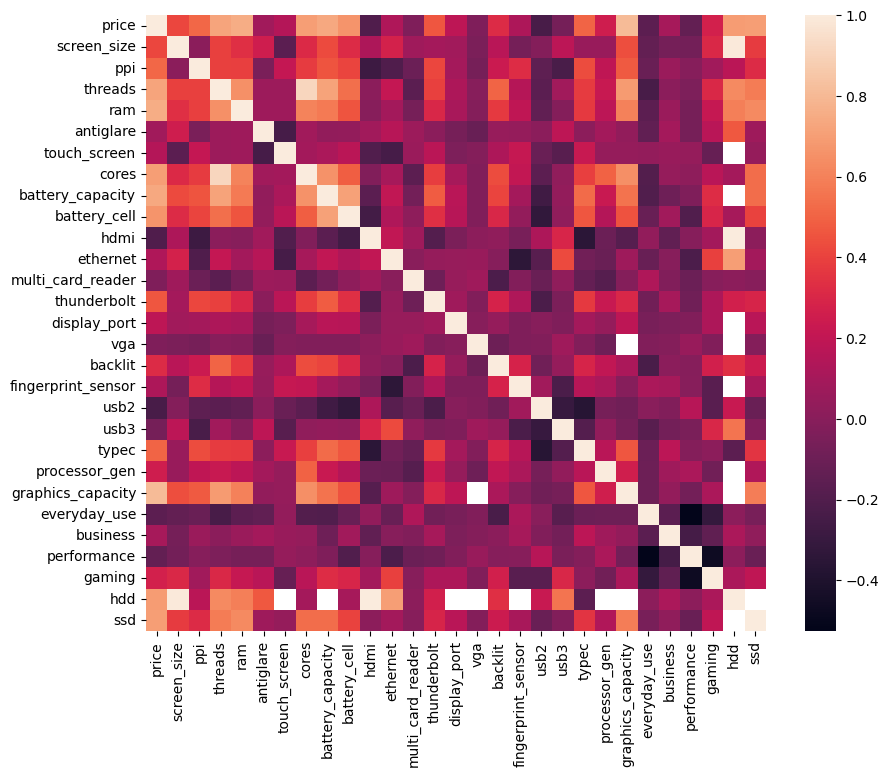

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True))

In [182]:
df["hdd"].isnull().sum()

779

# Planning
- There are 39 columns in this , we cannot compare or find relation with each and every column
- We are 

# 1.Price

In [75]:
mean_prices=df.groupby("brand")["price"].mean().reset_index().sort_values(by="price",ascending=False)
fig = px.bar(mean_prices,x="brand", y="price", title="Median Prices by Brand")
fig.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_768\3353634744.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [76]:
df.columns

Index(['brand', 'price', 'thickness', 'weight', 'screen_size', 'ppi',
       'threads', 'ram', 'antiglare', 'touch_screen', 'cores',
       'battery_capacity', 'battery_cell', 'hdmi', 'ethernet',
       'multi_card_reader', 'thunderbolt', 'display_port', 'vga', 'backlit',
       'fingerprint_sensor', 'usb2', 'usb3', 'typec', 'processor_gen',
       'processor_brand', 'processor_model', 'graphics_brand',
       'graphics_capacity', 'graphics_model', 'everyday_use', 'business',
       'performance', 'gaming', 'hdd', 'ssd', 'popularity', 'quality_type',
       'ppi_type'],
      dtype='object')

In [77]:
mean_prices=df.groupby("thickness")["price"].mean().reset_index().sort_values(by="price",ascending=False)
fig = px.bar(mean_prices,x="thickness", y="price", title="Median Prices by Brand")
fig.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_768\135000492.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [81]:
df.columns

Index(['brand', 'price', 'thickness', 'weight', 'screen_size', 'ppi',
       'threads', 'ram', 'antiglare', 'touch_screen', 'cores',
       'battery_capacity', 'battery_cell', 'hdmi', 'ethernet',
       'multi_card_reader', 'thunderbolt', 'display_port', 'vga', 'backlit',
       'fingerprint_sensor', 'usb2', 'usb3', 'typec', 'processor_gen',
       'processor_brand', 'processor_model', 'graphics_brand',
       'graphics_capacity', 'graphics_model', 'everyday_use', 'business',
       'performance', 'gaming', 'hdd', 'ssd', 'popularity', 'quality_type',
       'ppi_type'],
      dtype='object')

In [82]:
mean_prices=df.groupby("weight")["price"].mean().reset_index().sort_values(by="price",ascending=False)
fig = px.bar(mean_prices,x="weight", y="price", title="Median Prices by Brand")
fig.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_768\2318357581.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [101]:
mean_prices=df.groupby("screen_size")["price"].mean().reset_index()
fig = px.bar(mean_prices,x="screen_size", y="price", title="Median Prices by Screen Size")

# Add a scatter plot to overlay the curve
fig.add_trace(go.Scatter(x=mean_prices['screen_size'], y=mean_prices['price'], mode='lines', 
                         line=dict(color='orange', width=2), showlegend=False ))
fig.show()

In [110]:
mean_prices=df.groupby("ppi")["price"].mean().reset_index()
fig=px.scatter(df,x="ppi",y="price",color="brand")
fig.add_trace(go.Scatter(x=mean_prices["ppi"],y=mean_prices["price"],mode="lines"))
fig.show()

C:\Users\harsh\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\harsh\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [113]:
mean_prices=df.groupby("threads")["price"].mean().reset_index()
fig=px.scatter(df,x="threads",y="price",color="brand")
fig.add_trace(go.Scatter(x=mean_prices["threads"],y=mean_prices["price"],mode="lines"))
fig.show()

C:\Users\harsh\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\harsh\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [114]:
mean_prices=df.groupby("ram")["price"].mean().reset_index()
fig=px.scatter(df,x="ram",y="price",color="brand")
fig.add_trace(go.Scatter(x=mean_prices["ram"],y=mean_prices["price"],mode="lines"))
fig.show()

C:\Users\harsh\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\harsh\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



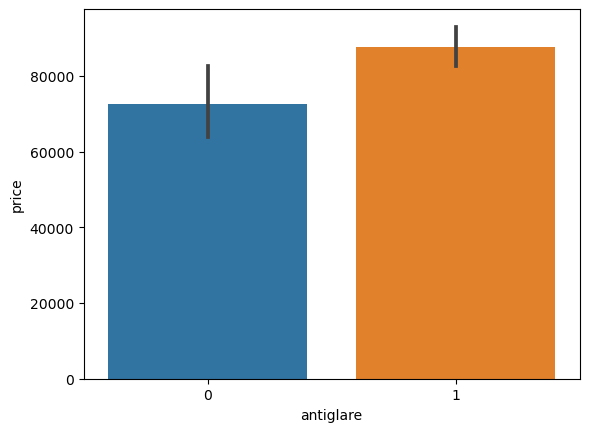

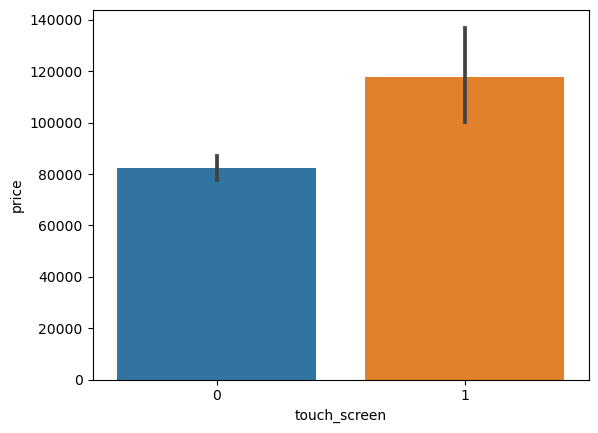

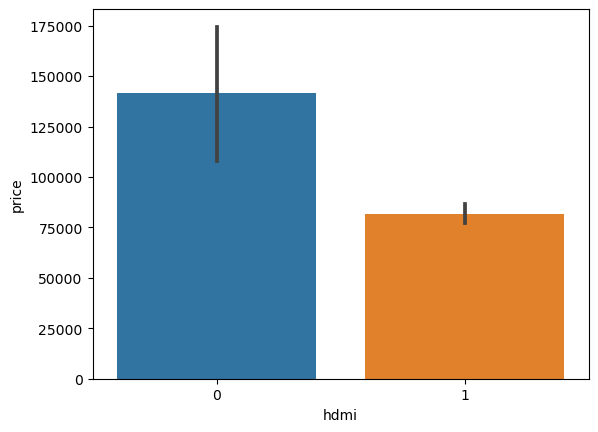

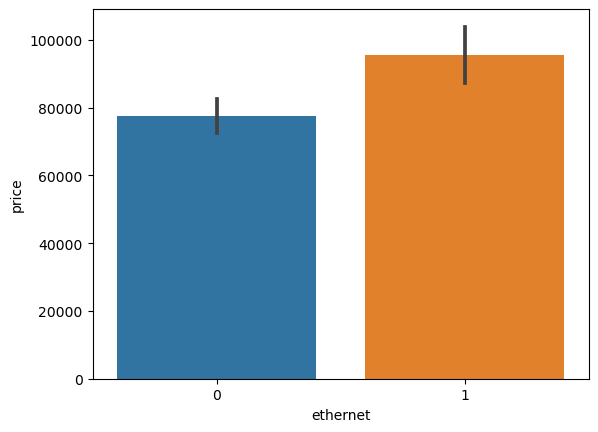

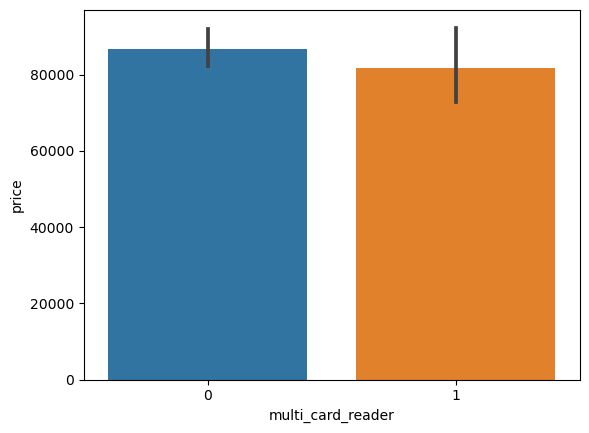

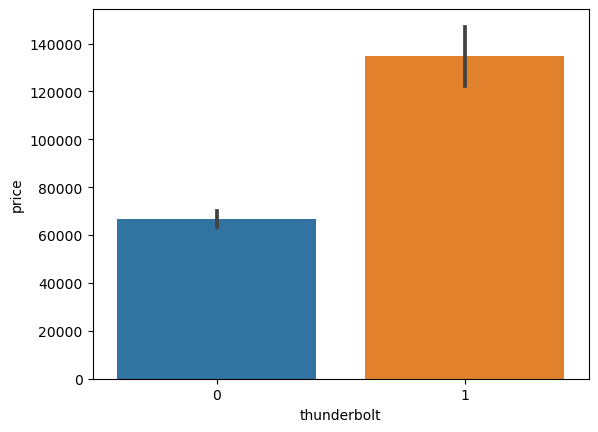

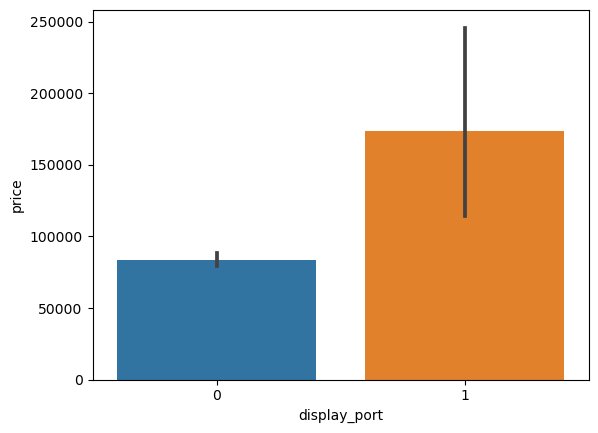

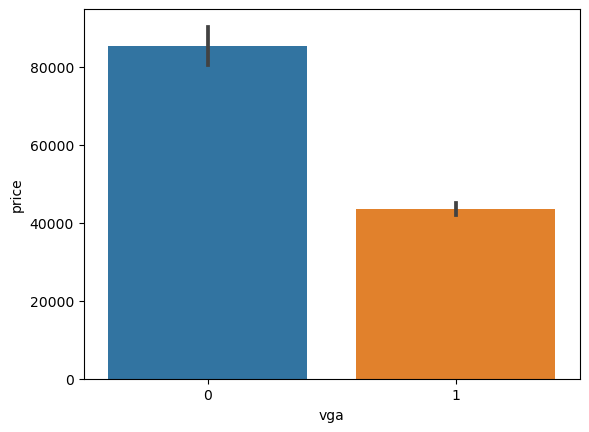

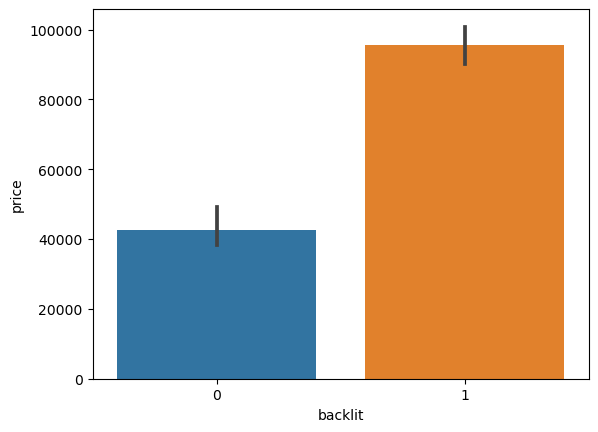

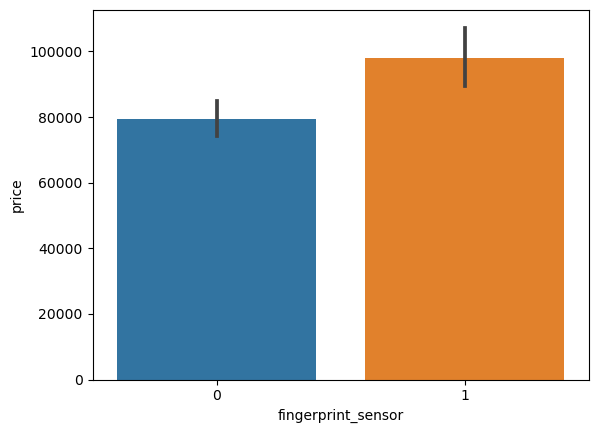

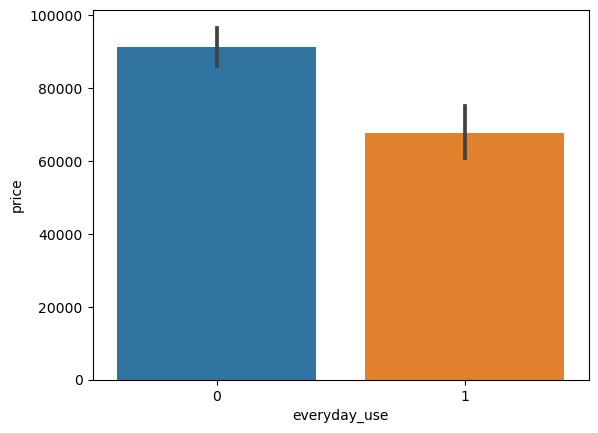

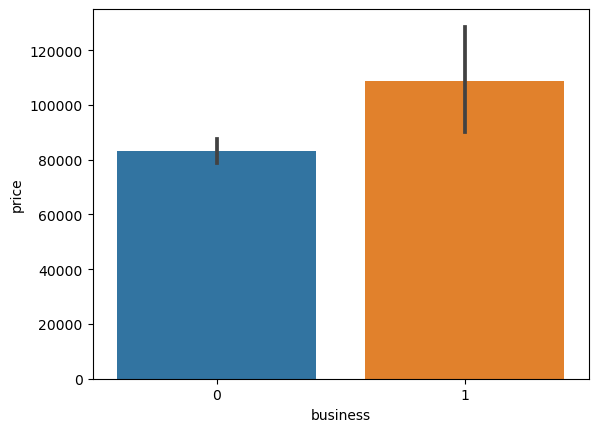

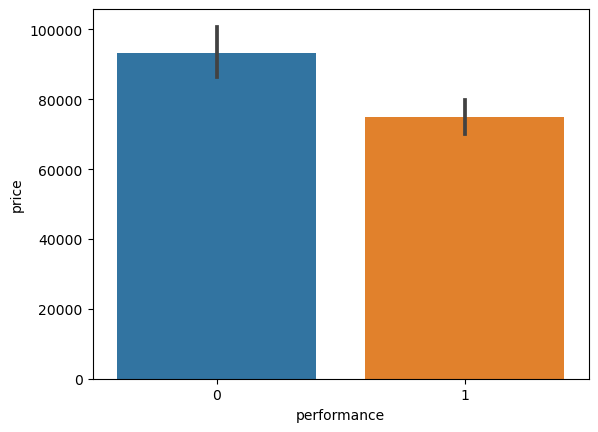

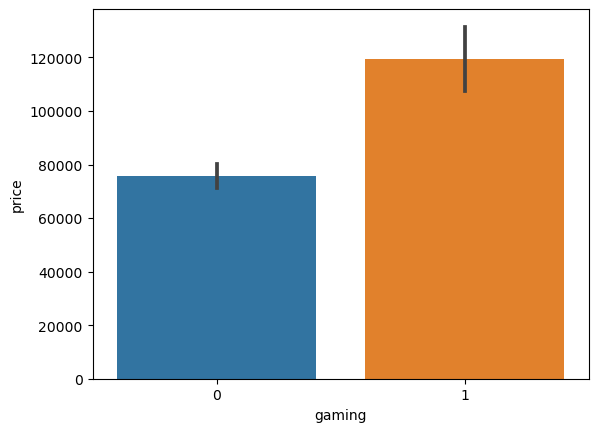

In [129]:
cat_cols=["antiglare","touch_screen","hdmi","ethernet","multi_card_reader","thunderbolt","display_port","vga","backlit","fingerprint_sensor","everyday_use","business","performance","gaming"]
for col in cat_cols:
    sns.barplot(data=df,x=col,y="price",estimator=np.mean)
    plt.show()

In [132]:
mean_prices=df.groupby("cores")["price"].mean().reset_index()
fig=px.scatter(df,x="cores",y="price",color="brand")
fig.add_trace(go.Scatter(x=mean_prices["cores"],y=mean_prices["price"],mode="lines"))
fig.show()

C:\Users\harsh\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\harsh\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
mean_prices=df.groupby("threads")["price"].mean().reset_index()
fig=px.scatter(df,x="threads",y="price",color="brand")
fig.add_trace(go.Scatter(x=mean_prices["threads"],y=mean_prices["price"],mode="lines"))
fig.show()

In [134]:
mean_prices=df.groupby("battery_capacity")["price"].mean().reset_index()
fig=px.scatter(df,x="battery_capacity",y="price",color="brand")
fig.add_trace(go.Scatter(x=mean_prices["battery_capacity"],y=mean_prices["price"],mode="lines"))
fig.show()

C:\Users\harsh\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\harsh\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [135]:
mean_prices=df.groupby("battery_cell")["price"].mean().reset_index()
fig=px.scatter(df,x="battery_cell",y="price",color="brand")
fig.add_trace(go.Scatter(x=mean_prices["battery_cell"],y=mean_prices["price"],mode="lines"))
fig.show()

C:\Users\harsh\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\harsh\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



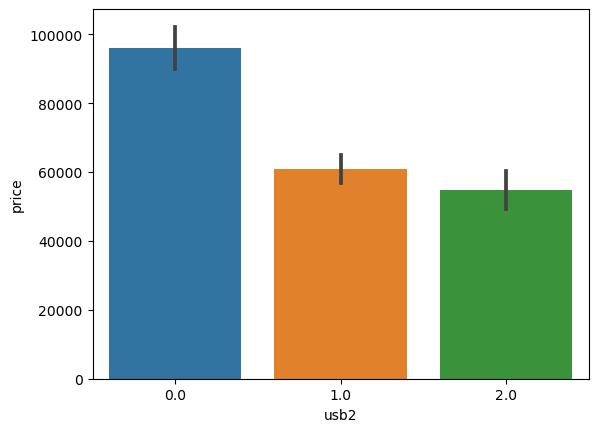

In [144]:
sns.barplot(df,x="usb2",y="price",estimator=np.mean)
plt.show()

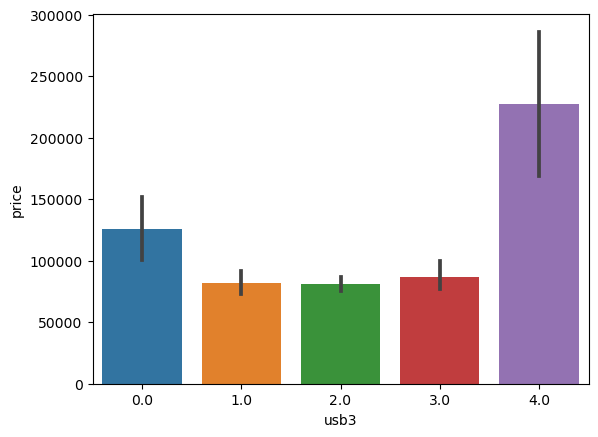

In [146]:
sns.barplot(df,x="usb3",y="price",estimator=np.mean)
plt.show()

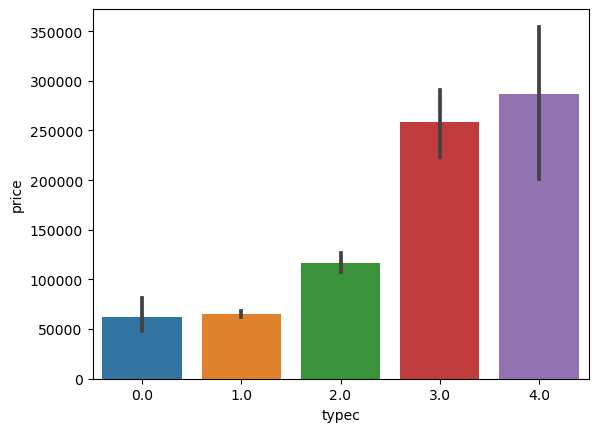

In [145]:
sns.barplot(df,x="typec",y="price",estimator=np.mean)
plt.show()

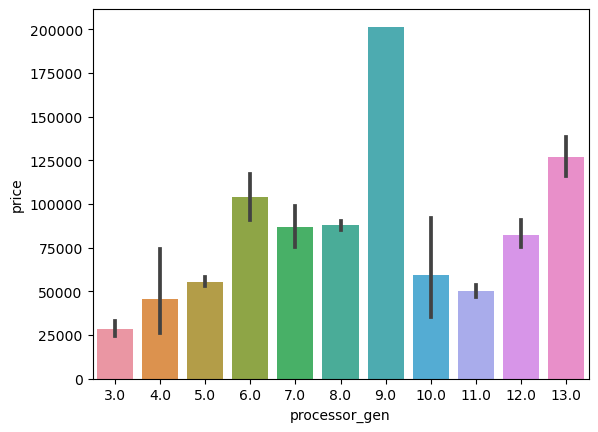

In [149]:
sns.barplot(df,x="processor_gen",y="price",estimator=np.mean)
plt.show()

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



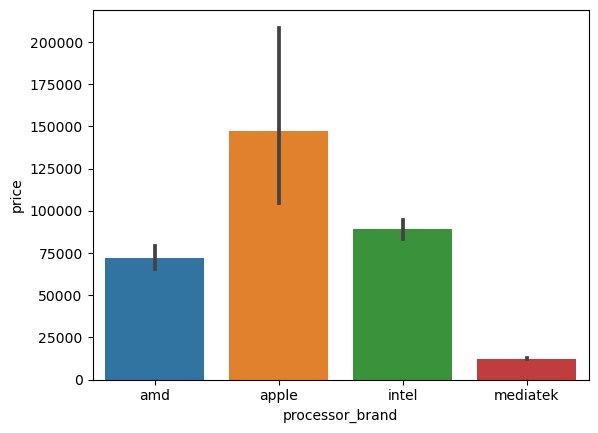

In [150]:
sns.barplot(df,x="processor_brand",y="price",estimator=np.mean)
plt.show()

In [151]:
df.columns

Index(['brand', 'price', 'thickness', 'weight', 'screen_size', 'ppi',
       'threads', 'ram', 'antiglare', 'touch_screen', 'cores',
       'battery_capacity', 'battery_cell', 'hdmi', 'ethernet',
       'multi_card_reader', 'thunderbolt', 'display_port', 'vga', 'backlit',
       'fingerprint_sensor', 'usb2', 'usb3', 'typec', 'processor_gen',
       'processor_brand', 'processor_model', 'graphics_brand',
       'graphics_capacity', 'graphics_model', 'everyday_use', 'business',
       'performance', 'gaming', 'hdd', 'ssd', 'popularity', 'quality_type',
       'ppi_type'],
      dtype='object')

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



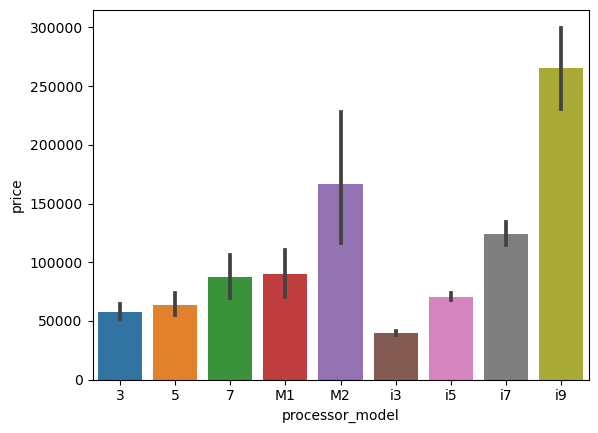

In [152]:
sns.barplot(df,x="processor_model",y="price",estimator=np.mean)
plt.show()

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



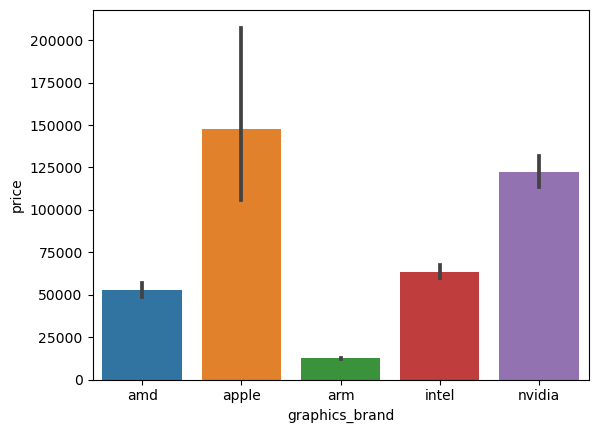

In [153]:
sns.barplot(df,x="graphics_brand",y="price",estimator=np.mean)
plt.show()

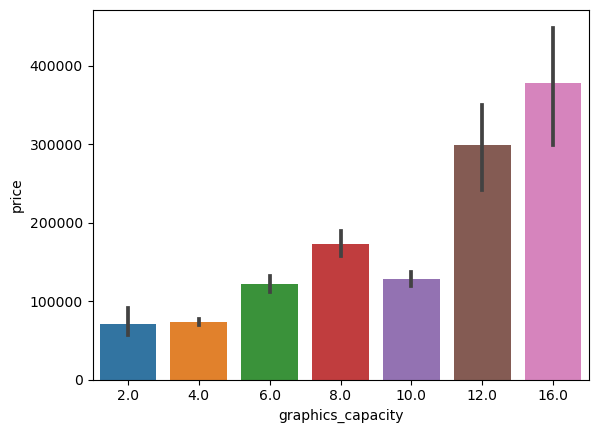

In [154]:
sns.barplot(df,x="graphics_capacity",y="price",estimator=np.mean)
plt.show()

In [167]:
mean_prices=df.groupby("graphics_model")["price"].mean().reset_index().sort_values(by="price",ascending=False)
px.bar(mean_prices,x="graphics_model",y="price")


C:\Users\harsh\AppData\Local\Temp\ipykernel_768\721274678.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [168]:
mean_prices=df.groupby("hdd")["price"].mean().reset_index().sort_values(by="price",ascending=False)
px.bar(mean_prices,x="hdd",y="price")

In [169]:
mean_prices=df.groupby("ssd")["price"].mean().reset_index().sort_values(by="price",ascending=False)
px.bar(mean_prices,x="ssd",y="price")

In [175]:
mean_prices=df.groupby("popularity")["price"].mean().reset_index().sort_values(by="price",ascending=False)
px.bar(mean_prices,x="popularity",y="price")

C:\Users\harsh\AppData\Local\Temp\ipykernel_768\2590141459.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [177]:
mean_prices=df.groupby("quality_type")["price"].mean().reset_index().sort_values(by="price",ascending=False)
px.bar(mean_prices,x="quality_type",y="price")

C:\Users\harsh\AppData\Local\Temp\ipykernel_768\940684441.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [178]:
mean_prices=df.groupby("ppi_type")["price"].mean().reset_index().sort_values(by="price",ascending=False)
px.bar(mean_prices,x="ppi_type",y="price")

C:\Users\harsh\AppData\Local\Temp\ipykernel_768\2006316255.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [176]:
df.columns

Index(['brand', 'price', 'thickness', 'weight', 'screen_size', 'ppi',
       'threads', 'ram', 'antiglare', 'touch_screen', 'cores',
       'battery_capacity', 'battery_cell', 'hdmi', 'ethernet',
       'multi_card_reader', 'thunderbolt', 'display_port', 'vga', 'backlit',
       'fingerprint_sensor', 'usb2', 'usb3', 'typec', 'processor_gen',
       'processor_brand', 'processor_model', 'graphics_brand',
       'graphics_capacity', 'graphics_model', 'everyday_use', 'business',
       'performance', 'gaming', 'hdd', 'ssd', 'popularity', 'quality_type',
       'ppi_type'],
      dtype='object')

## Conclusion
1. **Brand**
- The value of prices get affected by brands.
- Top 5 costliest brands are ["Razor","Huwawei","Apple","Gigabyte","Asus"]
2. **Thickness**
- The thickness of laptops also affect the prices
- thick laptops are costliest 
3. **Weight**
- slim and medium are approx same but heavy laptops are costly
4. **Screen Size**
- it does affect the prices and as we see that 13 inch laptops have high prices than prices decrease for 14 and 15inch laptops and than increase as the size increase.
5. **Threads**
- No. of threads also related with price.
- As we see it is related linearly means as the no. of threads increases price of the laptop also increases.
6. **RAM**
- Ran also related with price linearly.
- As the price increase price of the laptop also increases.
7. **Categorical Columns**
- so by seeing each and every barplot we see that if these properties are present than prices will:
  - antiglare-> Increase
  - touch_screen-> Increase
  - hdmi->Decrease
  - ethernet->Increase
  - Multi Card Reader-> Doesn't affect much
  - Thunderbolt->Significantly Increase
  - Display Port->Increase
  - VGA->Decrease
  - Backlight->Significantly Increase
  - Fingerprint Sensor->Increase
  - Everyday Use->Decrease
  - Bussiness->Increase
  - Performance->Decrease
  - Gaming->Significantly Increase
8. Cores
- As the no. of cores increases price of laptops also increases
9. Battery Capacity
- As the no. of battery cells increases price of laptops also increases


<Axes: >

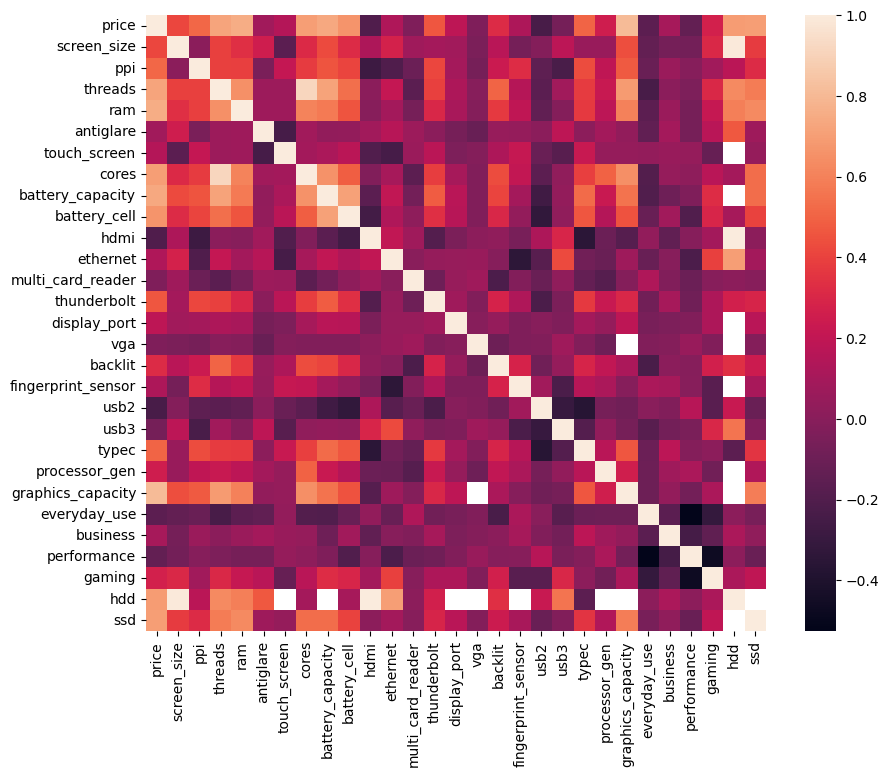

In [187]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True))

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 1019
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   brand               798 non-null    category
 1   price               798 non-null    int64   
 2   thickness           613 non-null    category
 3   weight              731 non-null    category
 4   screen_size         798 non-null    int64   
 5   ppi                 798 non-null    int64   
 6   threads             777 non-null    float64 
 7   ram                 798 non-null    int64   
 8   antiglare           798 non-null    int64   
 9   touch_screen        798 non-null    int64   
 10  cores               794 non-null    float64 
 11  battery_capacity    596 non-null    float64 
 12  battery_cell        639 non-null    float64 
 13  hdmi                798 non-null    int64   
 14  ethernet            798 non-null    int64   
 15  multi_card_reader   798 non-null    int64   

- Screen_size=>ssd,graphics capacity,battery capacity,ram,threads

In [205]:
px.scatter(df,x="screen_size",y="ssd")
gc_median=df.groupby("screen_size")["graphics_capacity"].median().reset_index()
px.line(gc_median,x="screen_size",y="graphics_capacity")

In [199]:
ss_count=df.groupby("screen_size")["battery_capacity"].mean().reset_index()
px.line(ss_count,x="screen_size",y="battery_capacity")

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='screen_size', ylabel='ppi'>

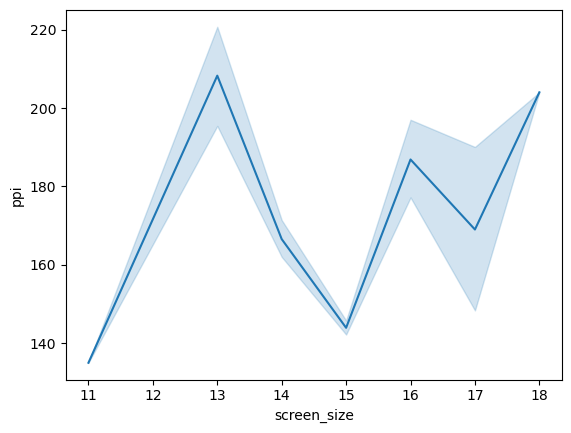

In [207]:

px.scatter(df,x="screen_size",y="ppi")
sns.lineplot(data=df,x="screen_size",y="ppi")


C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='screen_size', ylabel='ram'>

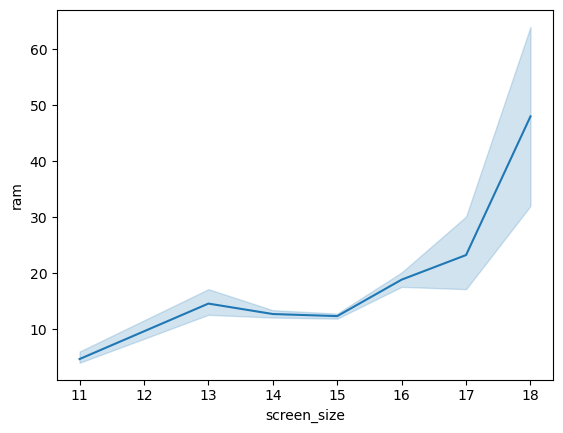

In [208]:
sns.lineplot(data=df,x="screen_size",y="ram")

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='screen_size', ylabel='threads'>

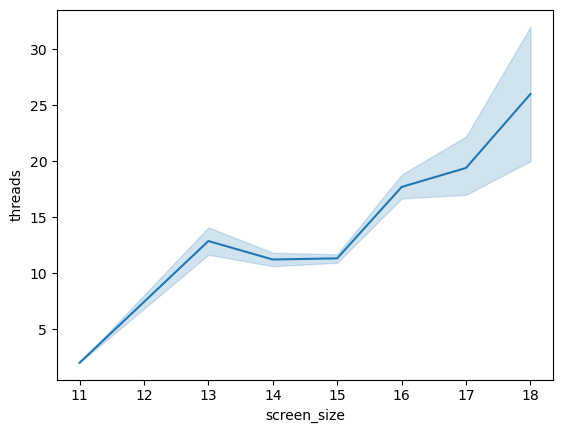

In [209]:
sns.lineplot(data=df,x="screen_size",y="threads")


<BarContainer object of 798 artists>

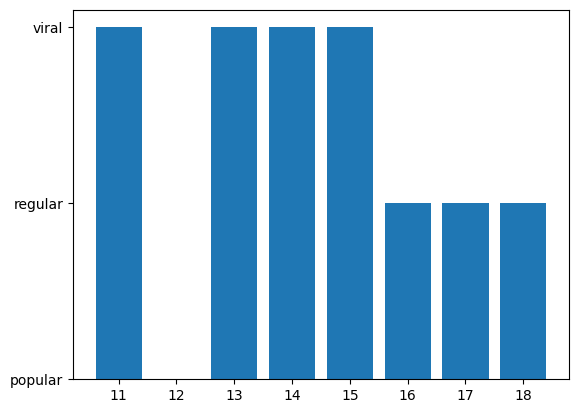

In [212]:
plt.bar(df["screen_size"],df["popularity"])


In [221]:
corre=df.corr(numeric_only=True)
fig=px.imshow(corre,x=corre.columns,y=corre.columns,color_continuous_scale='Viridis')
fig.update_layout(
    height=800,
    width=800
)
fig.show()

### Relations
- hdd-screen_size
- threads->ram,cores,battery_capacity,graphics_capacity
- ram->cores,graphics_capacity,ssd
- cores->battery_capacity,graphics_capacity
- battery_capacity->battery_cell,graphics_capacity,ssd
- battery_cell->graphics_capacity,threads,cores
- hdmi->hdd
- ethernet->hdd
- multicard_reader
- thunderbolt->battery_capacity
- display_port
- VGA
- backlight->threads
- fingerprint_sensor
- usb2
- usb3->hdd
- typec->battery_capacity,graphics_capacity
- processor_gen->cores
- graphics_capacity->ppi,ssd
- hdd
- ssd->threads,cores,graphics_capacity
- brand->

In [223]:
df["battery_capacity"].isnull().sum()

202

In [224]:
df.columns

Index(['brand', 'price', 'thickness', 'weight', 'screen_size', 'ppi',
       'threads', 'ram', 'antiglare', 'touch_screen', 'cores',
       'battery_capacity', 'battery_cell', 'hdmi', 'ethernet',
       'multi_card_reader', 'thunderbolt', 'display_port', 'vga', 'backlit',
       'fingerprint_sensor', 'usb2', 'usb3', 'typec', 'processor_gen',
       'processor_brand', 'processor_model', 'graphics_brand',
       'graphics_capacity', 'graphics_model', 'everyday_use', 'business',
       'performance', 'gaming', 'hdd', 'ssd', 'popularity', 'quality_type',
       'ppi_type'],
      dtype='object')

In [225]:
cat_cols=["brand","processor_brand","processor_model","graphics_brand","popularity","quality_type","ppi_type"]

<BarContainer object of 798 artists>

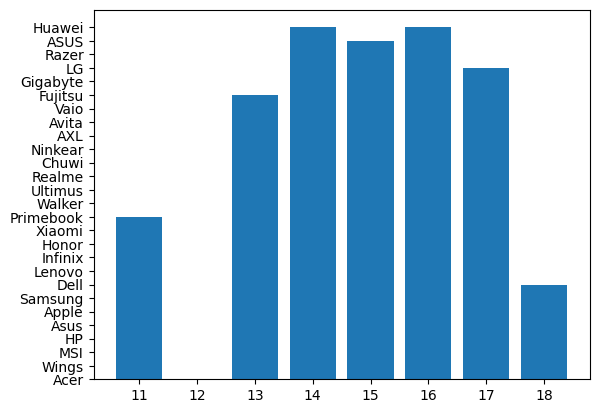

In [226]:
plt.bar(df["screen_size"],df["brand"])

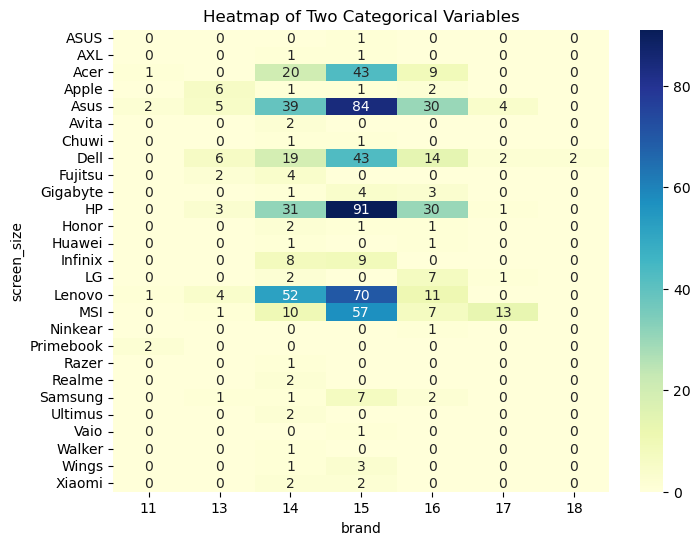

In [230]:
contingency_table=pd.crosstab(df["brand"],df["screen_size"])
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Two Categorical Variables')
plt.xlabel('brand')
plt.ylabel('screen_size')
plt.show()


# 3.Brand

In [270]:
#We should convert columns which give 1 or 0 to categorical column
cat_cols=["antiglare","touch_screen","hdmi","ethernet","multi_card_reader","thunderbolt","display_port","vga","backlit","fingerprint_sensor","usb2","usb3","typec","everyday_use","business","performance","gaming"]
for col in cat_cols:
    df[col]=df[col].astype("category")

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 1019
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   brand               798 non-null    category
 1   price               798 non-null    int64   
 2   thickness           613 non-null    category
 3   weight              731 non-null    category
 4   screen_size         798 non-null    int64   
 5   ppi                 798 non-null    int64   
 6   threads             777 non-null    float64 
 7   ram                 798 non-null    int64   
 8   antiglare           798 non-null    category
 9   touch_screen        798 non-null    category
 10  cores               794 non-null    float64 
 11  battery_capacity    596 non-null    float64 
 12  battery_cell        639 non-null    float64 
 13  hdmi                798 non-null    category
 14  ethernet            798 non-null    category
 15  multi_card_reader   798 non-null    category

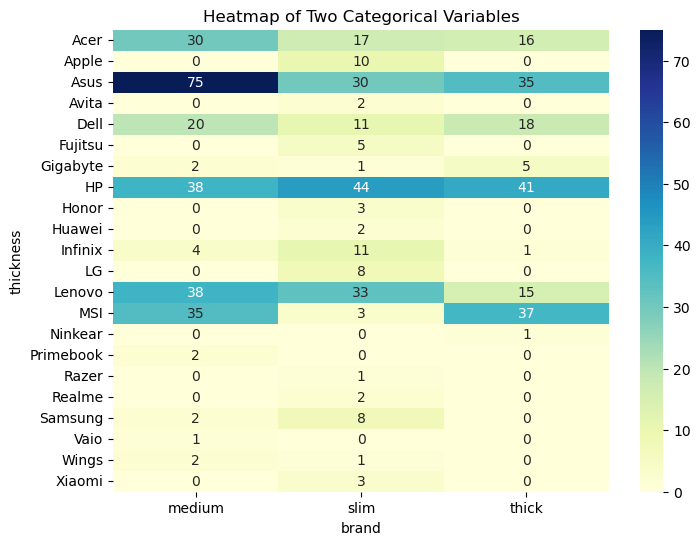

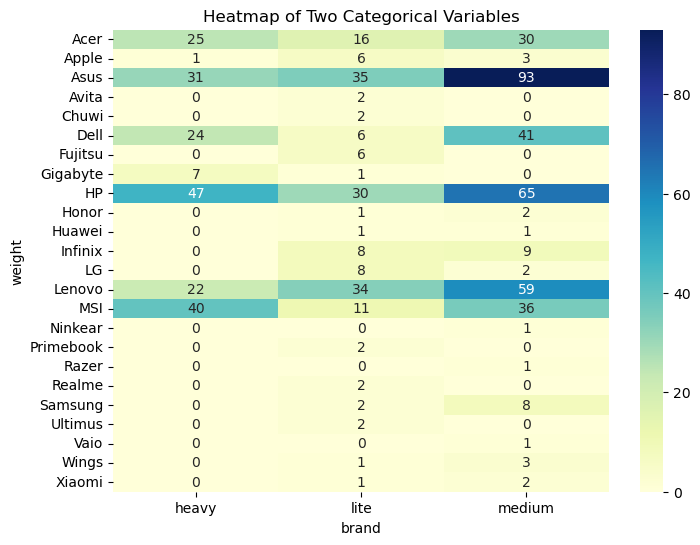

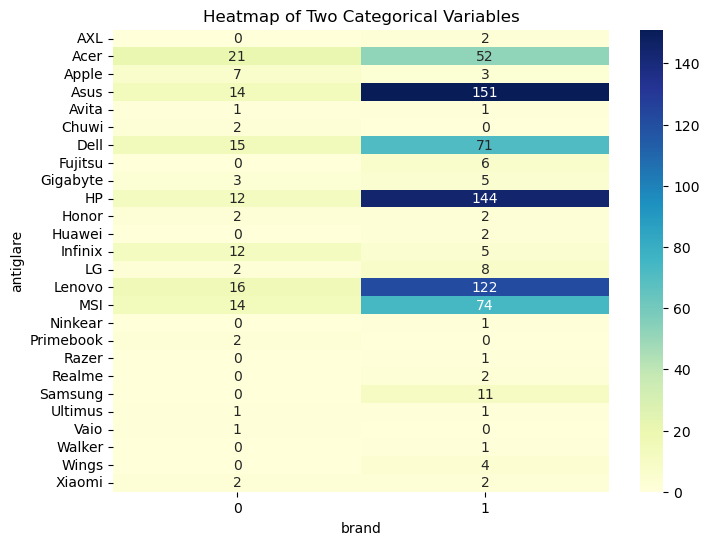

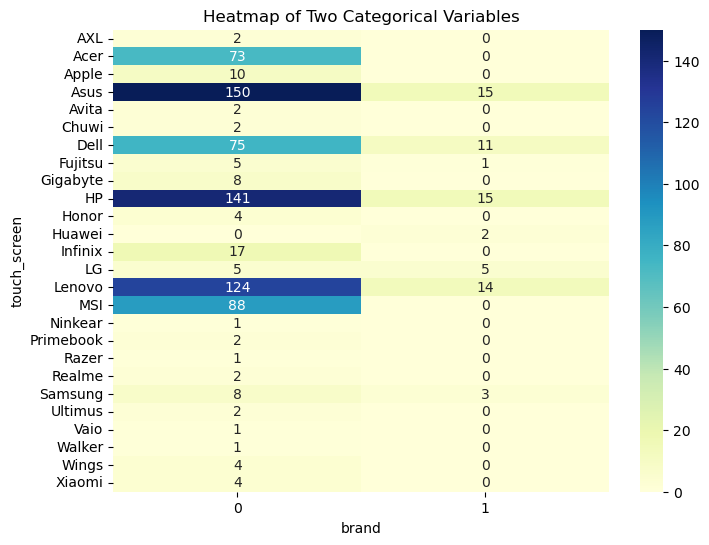

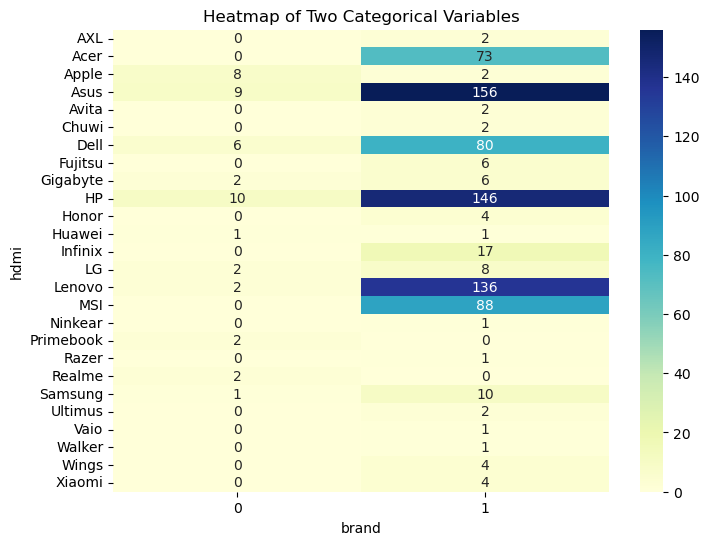

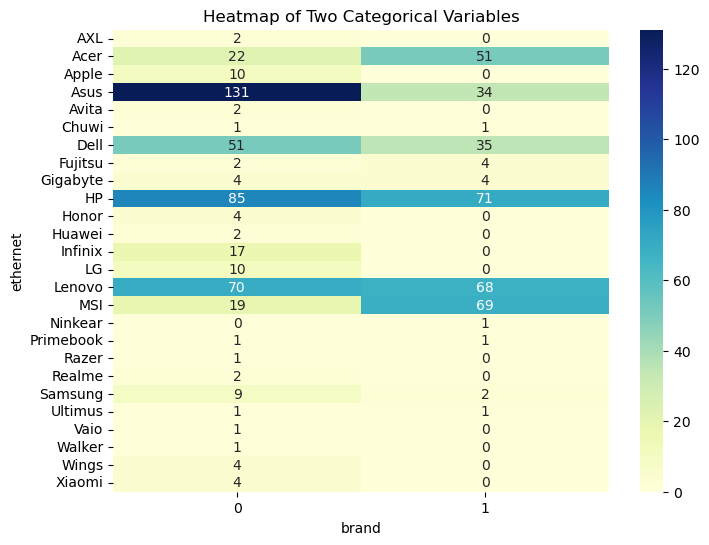

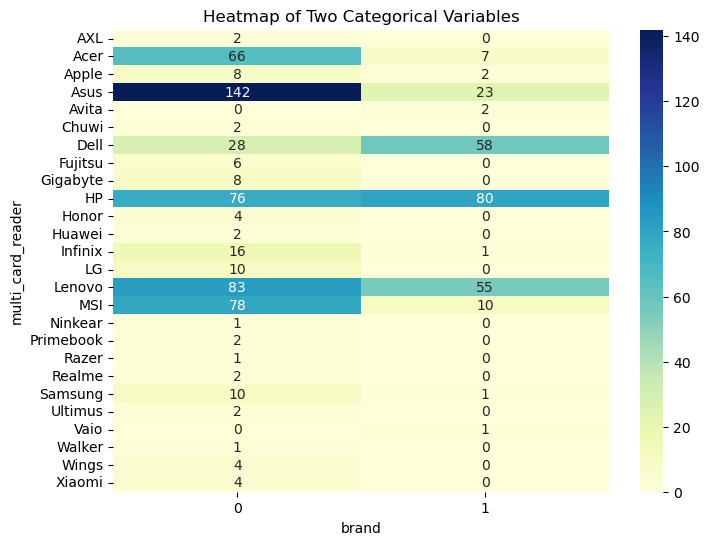

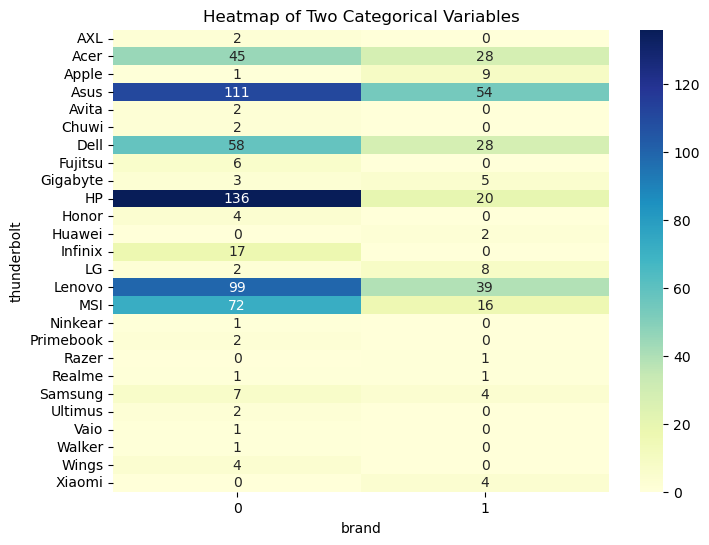

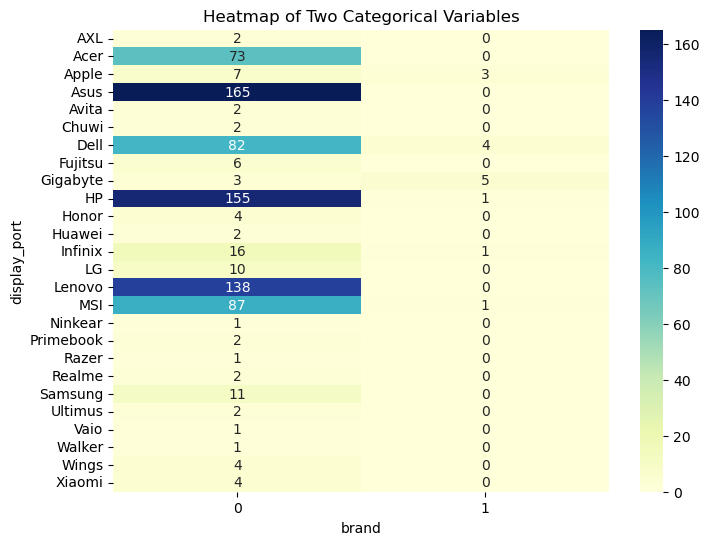

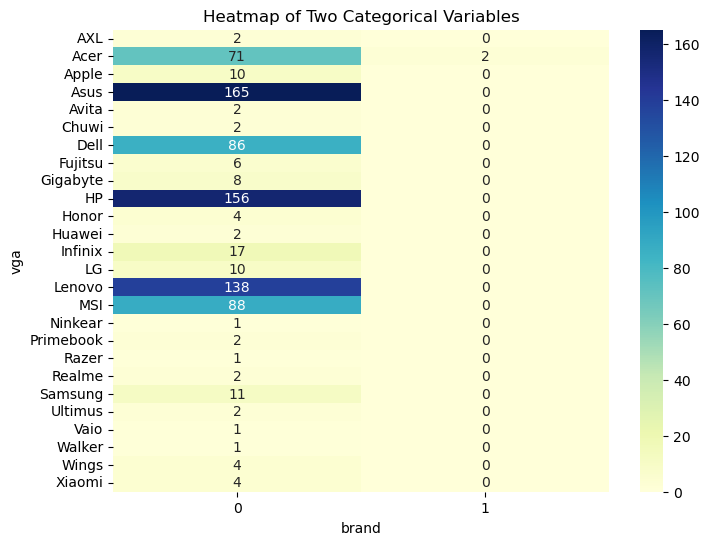

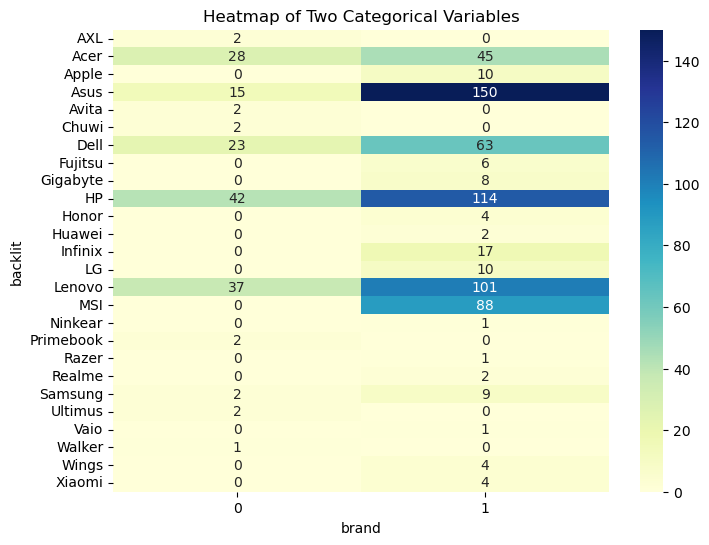

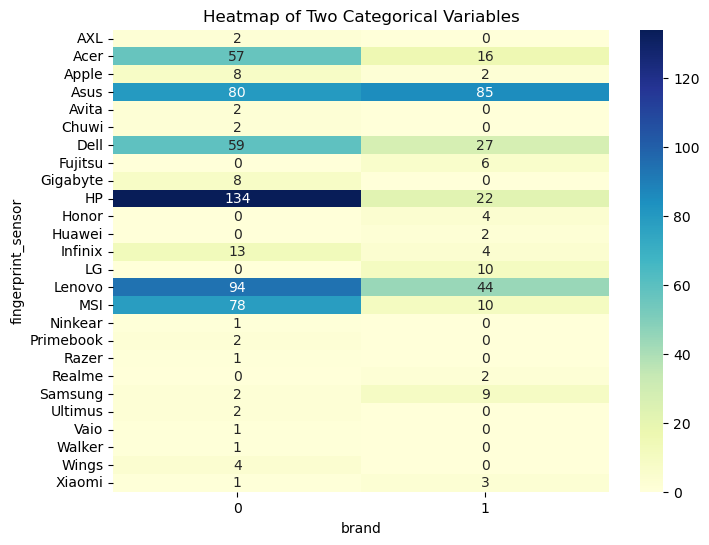

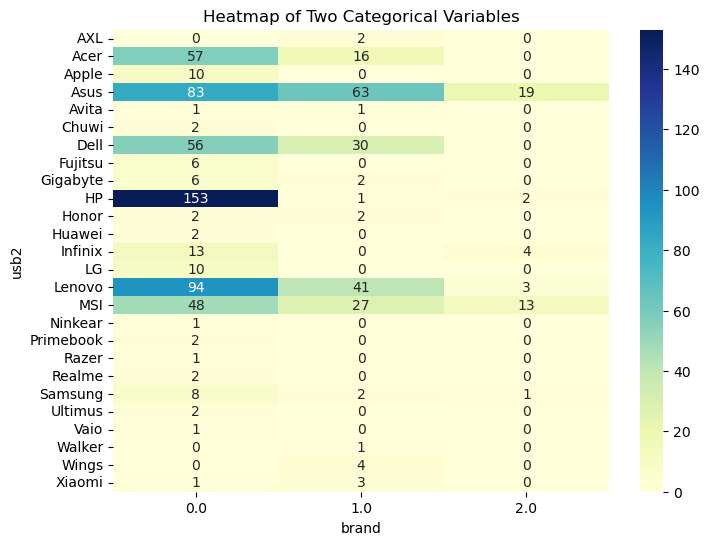

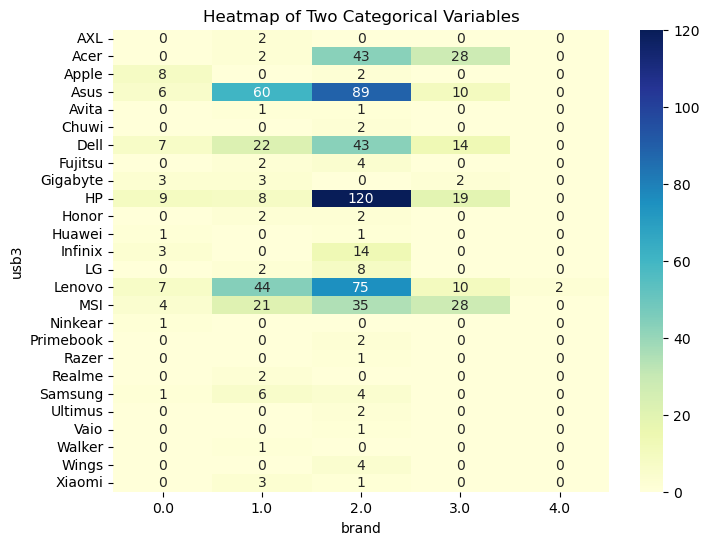

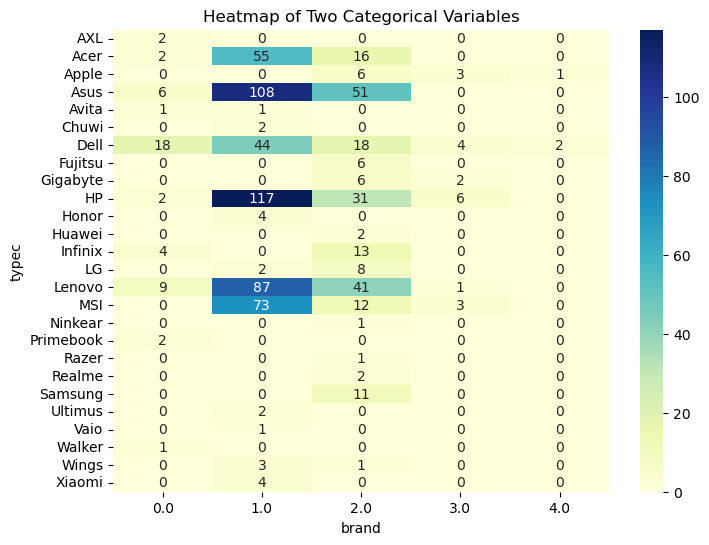

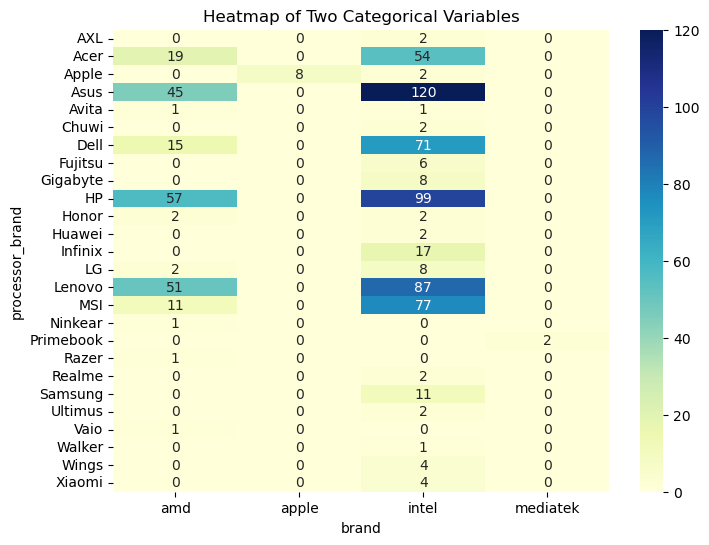

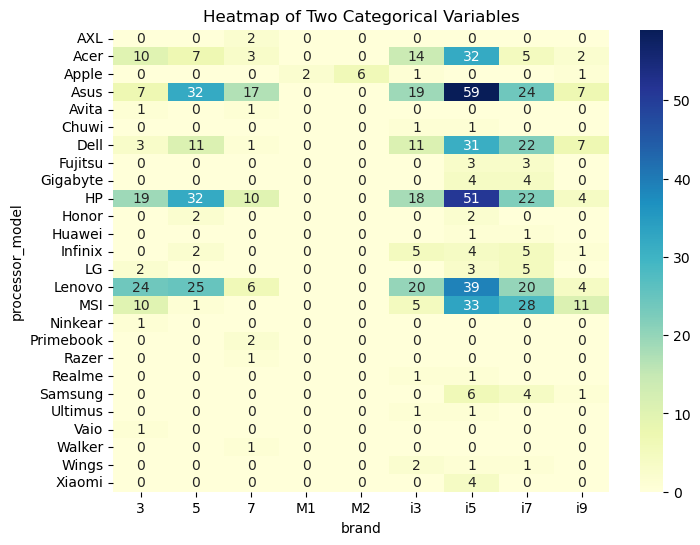

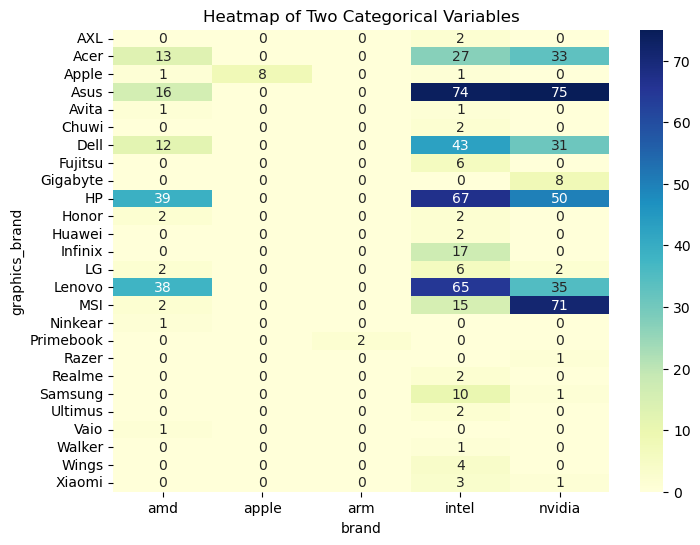

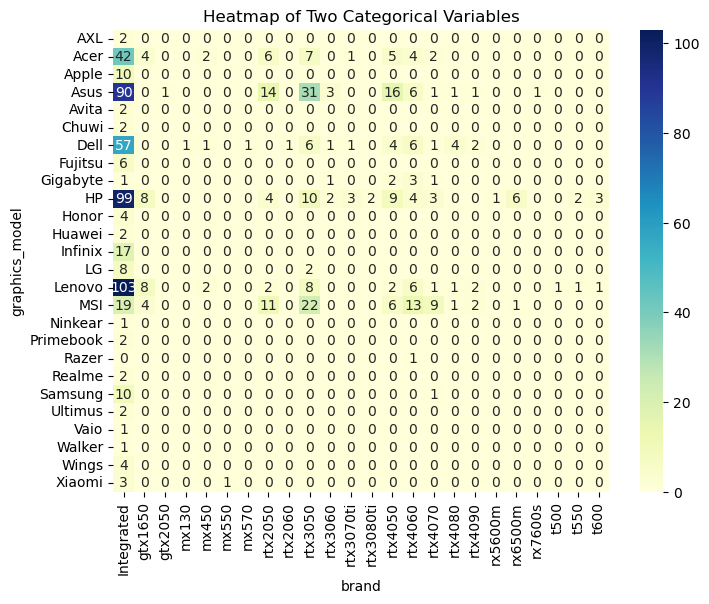

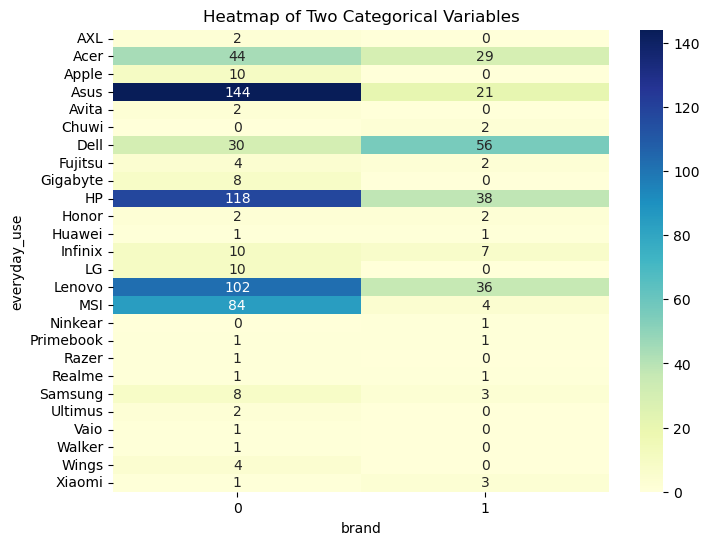

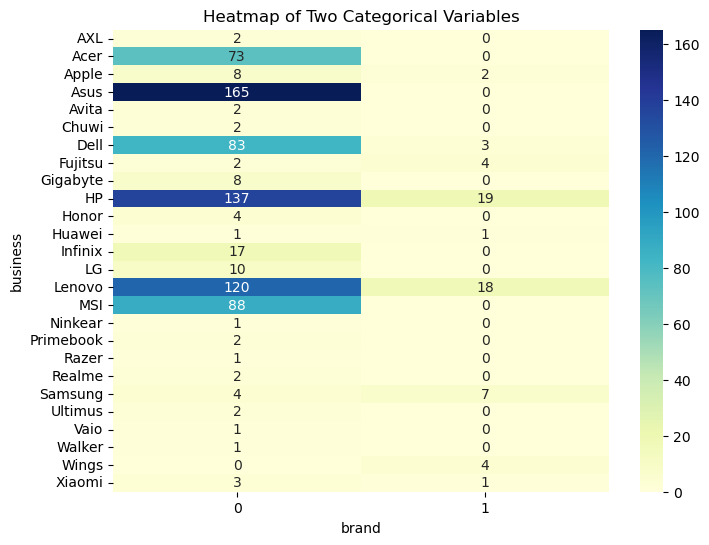

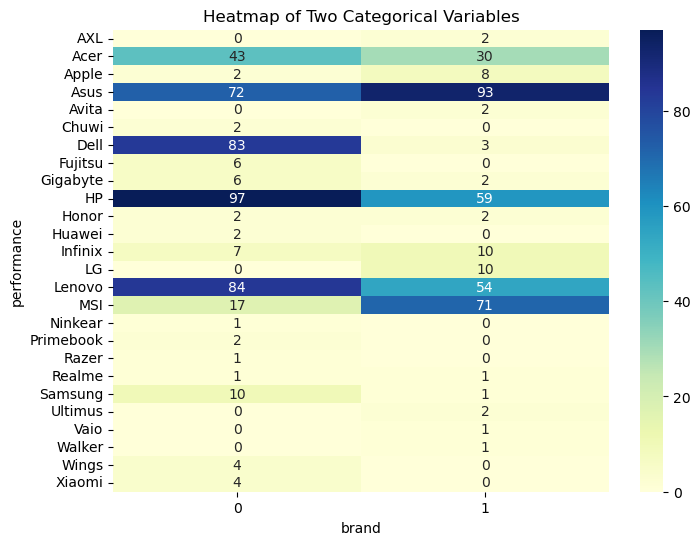

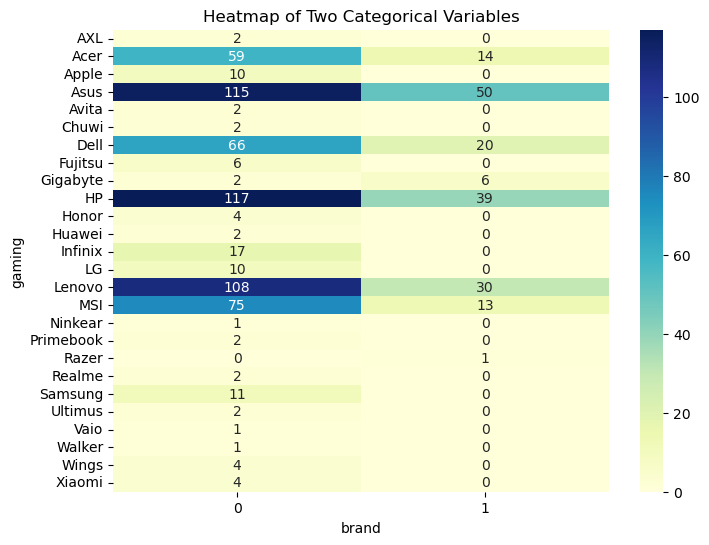

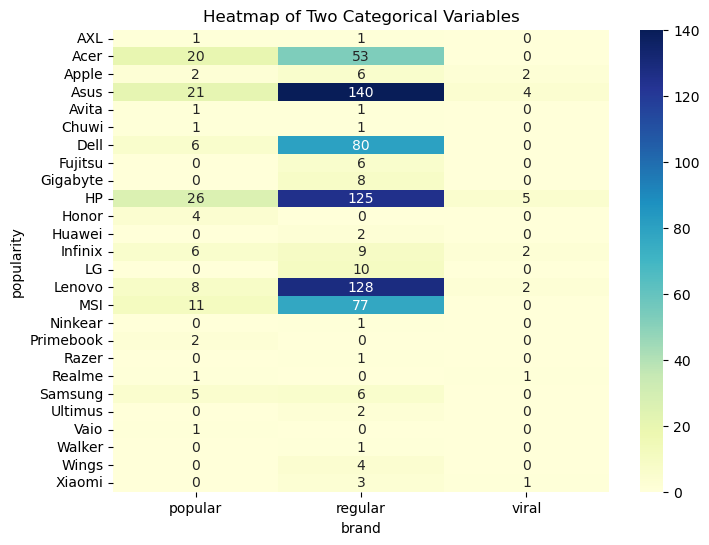

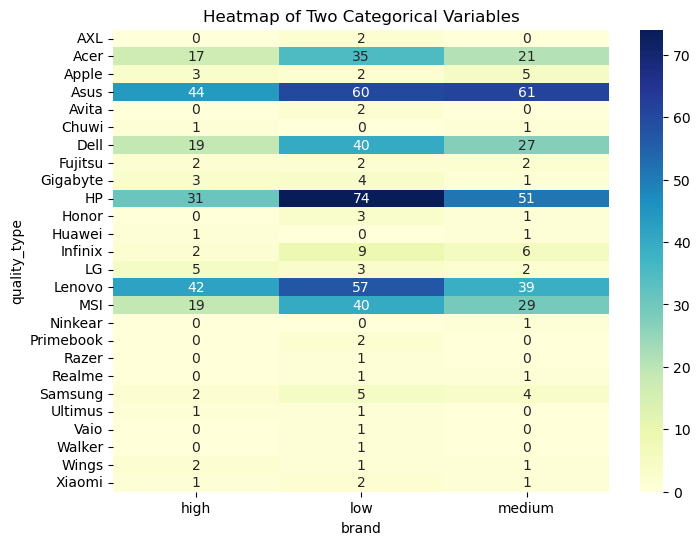

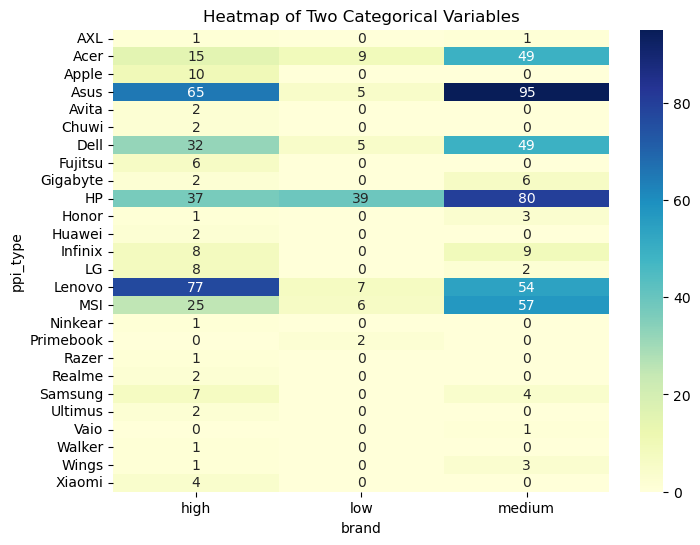

In [271]:
for col in df.columns[1:]:
    if df[col].dtype=="category":
        contingency_table=pd.crosstab(df["brand"],df[col])
        plt.figure(figsize=(8, 6))
        sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
        plt.title('Heatmap of Two Categorical Variables')
        plt.xlabel('brand')
        plt.ylabel(col)
        plt.show()
    else:
        counts=df.groupby("brand")[col].mean().reset_index().sort_values(by=col,ascending=False)
        fig=px.histogram(counts,x="brand",y=col)
        fig.show()
        

## Conclusion
- "Chuwi" gives the highest ppi
- Most brands make medium laptops , msi makes medium to thick laptops .
- Weightwise most laptops fall under medium category, but some brands like "msi" , "hp" made heavier laptops than other brands.
- "gigabyte", "razer", "nikear" provides the highest no. of threads
- Ninkear and razer provides 32gb ram on an average
- asus and hp mostly provide antiglare in their laptops but apple doesn't provide antiglare in most of their laptops. 
- verry few companies make touchscreen laptops , companies like ,lenovo, hp ,dell and samsung.
- gigabyte, huawei, lg ,samsung and fujitsu provide more no. of cores in their laptops.
- ninkear ,  gigabyte,lg provide highest battery capacity and xiaomi will provide least .
- dell, fujitsu and samsung provide highest battery cell.
- most results doesn't have multi card reader or thunderbolt or display_port or vga port 
- brands  like hp , apple doesn't provide usb2.0 port in their laptops.
- Approx. every brand provide typec in their laptops.
- fujitsu , huawei , samsung provide higher generation of processors.
- except primebook no one provides meadiatek processor.
- apple processor are only provided by apple laptops.
- only primebook use arm brand graphics
- apple and razer have the highest capacity.
- lenovo, dell,hp , asus mostly provided integrated graphics.
- by seeing data we conclude that msi makes mostly performance or gaming laptops.
- ninkear, razer,huawei,gigabyte and msi provides highest space in ssd.
- out of 8 products of apple 2 are popular and 2 went viral
- products of asus and lenovo are high quality